In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()

#### Code 3.1

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) Pr(vampire) + Pr(positive|mortal) 1 − Pr(vampire)$$

In [3]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2 - 3.5

We are going to use the same function we use on chapter 2 (code 2.3)

In [142]:
def posterior_grid_approx(
    grid_points=100, 
    success=6, 
    tosses=9, 
    prior=''
):
    assert prior != '', 'Please pass in a prior!'
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    #prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [5]:
np.random.choice([0.0, 0.1, 0.2, 0.3], p=[0.25, 0.25, 0.25, 0.25], size=int(1e4), replace=True)

array([ 0.1,  0.2,  0.2, ...,  0.2,  0.3,  0. ])

In [6]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
print(len(p_grid), len(posterior))
# sample from p_grid with probability p=posterior
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

100 100


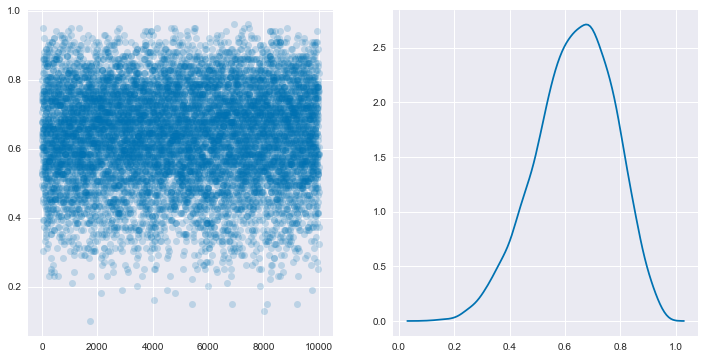

In [7]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
sns.kdeplot(samples, ax=ax1)

#### Code 3.6

In [8]:
sum(posterior[ p_grid < 0.5 ])

0.17183313110747478

#### Code 3.7

In [9]:
sum( samples < 0.5 ) / 1e4

0.16880000000000001

#### Code 3.8

In [10]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.6149

#### Code 3.9

In [11]:
np.percentile(samples, 80)

0.75757575757575768

#### Code 3.10

In [12]:
np.percentile(samples, [10, 90])

array([ 0.44444444,  0.80808081])

#### Code 3.11

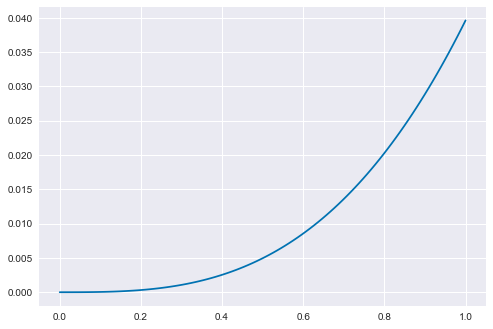

In [13]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
plt.plot(p_grid, posterior);

#### Code 3.12

In [14]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([ 0.70707071,  0.93939394])

#### Code 3.13

In [15]:
pm.hpd(samples, alpha=0.5)

array([ 0.82828283,  0.98989899])

#### Code 3.14

In [16]:
p_grid[posterior == max(posterior)]

array([ 1.])

#### Code 3.15

In [17]:
stats.mode(samples)[0]

array([ 0.98989899])

#### Code 3.16

In [18]:
np.mean(samples), np.median(samples)

(0.80255454545454563, 0.83838383838383845)

#### Code 3.17

In [19]:
sum(posterior * abs(0.5 - p_grid))

0.31626874808692995

#### Code 3.18 and 3.19

In [20]:
sum(abs(0.5 - np.array([1,2]))  * np.array([1,2]))

3.5

In [21]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([ 0.84848485])

#### Code 3.20

In [22]:
# The probability of getting 0, 1, 2 counts of water given that the probability of water = 0.7, 
# and you've sampled twice.

# i.e. probability of data given hypothesis (likelihood)
stats.binom.pmf(range(3), n=2, p=0.7)

array([ 0.09,  0.42,  0.49])

#### Code 3.21

In [23]:
# simulate sampling from a binomial distribution with p=0.7, n=2
stats.binom.rvs(n=2, p=0.7, size=1)

array([1])

#### Code 3.22

In [24]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 2])

In [25]:
stats.binom.rvs(n=15, p=0.5, size=10)

array([ 8,  6,  8,  8,  8,  5, 10,  7,  9, 10])

#### Code 3.23

In [26]:
(np.array([0,1,0]) == 1).mean()

0.33333333333333331

In [27]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.088220000000000007, 0.41888999999999998, 0.49288999999999999]

#### Code 3.24, 3.25 and 3.26

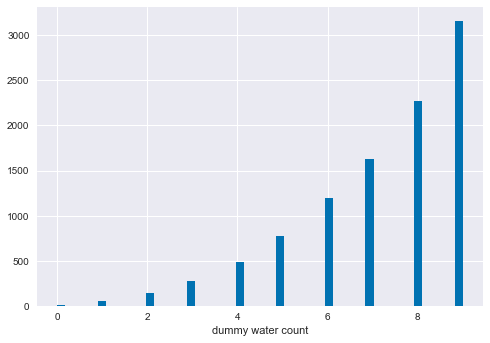

In [28]:
#dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
#dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
dummy_w = stats.binom.rvs(n=9, p=samples)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count');

#### Code 3.27

In [29]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
hw_samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### Code 3.28

In [30]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

#### Code 3.29

#### Code 3.30

In [31]:
sum(birth1) + sum(birth2)

111

# 3.5 Practice

## 3E1.

How much posterior probability lies below $p=0.2$?

In [32]:
# There are 20 grid points that represent posterior probability of less than 0.2
# Summing them gives us probability of less than 0.2
posterior[:int(len(posterior)*0.2)].sum()

0.00078131518903528654

In [33]:
# Alternatively, we could also look at the samples.
# What is the probability of samples being less than 0.2?
(hw_samples < 0.2).mean()

0.00089999999999999998

## 3E2.

How much posterior probability lies above $p=0.8$?

In [34]:
posterior[int(len(posterior)*0.8):].sum()

0.11553983005329518

In [35]:
(hw_samples > 0.8).mean()

0.1169

## 3E3. 

How much posterior probability lies between $p=0.2$ and $p=0.8$?

In [36]:
posterior[int(len(posterior)*0.2):int(len(posterior)*0.8)].sum()

0.8836788547576695

In [37]:
((hw_samples < 0.8) & (hw_samples > 0.2)).mean()

0.88219999999999998

## 3E4.

$20\%$ of the posterior probability lies below which value of $p$?

In [38]:
np.percentile([1,2,3,4,5,1,2,3,4,5], 0.2)

1.0

In [39]:
np.percentile(hw_samples, 20)

0.51515151515151525

## 3E5.

$20\%$ of the posterior probability lies above which value of $p$?

In [40]:
np.percentile(hw_samples, 80)

0.75757575757575768

## 3E6.

Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

In [41]:
np.percentile(hw_samples, [1/6.0*100, 5/6.0*100])

array([ 0.49494949,  0.77777778])

In [42]:
# HIPD should be the narrowest because the decrease in heights make up for the decrease in the 
# width of the interval.

pm.hpd(samples, alpha=1.0/3)

array([ 0.75757576,  1.        ])

In [43]:
# Here's the interval where area below the lower-bound is same as area above upper-bound,
# just for comparison with HIPD:
np.percentile(hw_samples, [1/6.0*100, 5/6.0*100])

array([ 0.49494949,  0.77777778])

## 3E7.

Which values of $p$ contain $66\%$ of the posterior probability, assuming equal posterior probability below and above the interval?

In [44]:
print(np.percentile(samples, 1.0/6 * 100), np.percentile(samples, 5.0/6 * 100))

0.646464646465 0.959595959596


## 3M1.

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


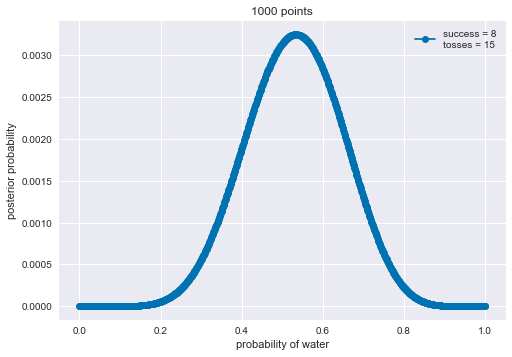

In [241]:
def grid_approx_plot(
    points=100, 
    w=6, 
    n=9,
    prior=np.repeat(5,100),
    x_label='probability of water'
):
    
    p_grid, posterior = posterior_grid_approx(
        grid_points=points,
        success=w,
        tosses=n,
        prior=prior
    )
    plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
    plt.xlabel(x_label)
    plt.ylabel('posterior probability')
    plt.title('{} points'.format(points))
    plt.legend(loc=0)
    
    return p_grid, posterior
    
p_grid_n_15_w_8, posterior_n_15_w_8 = grid_approx_plot(
    w=8, n=15, points=1000, prior=np.repeat(1, 1000)
)

In [46]:
p_grid_n_15_w_8

array([ 0.        ,  0.001001  ,  0.002002  ,  0.003003  ,  0.004004  ,
        0.00500501,  0.00600601,  0.00700701,  0.00800801,  0.00900901,
        0.01001001,  0.01101101,  0.01201201,  0.01301301,  0.01401401,
        0.01501502,  0.01601602,  0.01701702,  0.01801802,  0.01901902,
        0.02002002,  0.02102102,  0.02202202,  0.02302302,  0.02402402,
        0.02502503,  0.02602603,  0.02702703,  0.02802803,  0.02902903,
        0.03003003,  0.03103103,  0.03203203,  0.03303303,  0.03403403,
        0.03503504,  0.03603604,  0.03703704,  0.03803804,  0.03903904,
        0.04004004,  0.04104104,  0.04204204,  0.04304304,  0.04404404,
        0.04504505,  0.04604605,  0.04704705,  0.04804805,  0.04904905,
        0.05005005,  0.05105105,  0.05205205,  0.05305305,  0.05405405,
        0.05505506,  0.05605606,  0.05705706,  0.05805806,  0.05905906,
        0.06006006,  0.06106106,  0.06206206,  0.06306306,  0.06406406,
        0.06506507,  0.06606607,  0.06706707,  0.06806807,  0.06

## 3M2. 

Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for $p$.

In [47]:
# for 10000 times, choose from p_grid_n_15_w_8 with probability p
samples_15_w_8 = np.random.choice(p_grid_n_15_w_8, p=posterior_n_15_w_8, size=int(10000), replace=True)
pm.hpd(samples_15_w_8, alpha=1.0-0.9)

array([ 0.34034034,  0.72672673])

In [48]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was created on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

This notebook was created on a computer x86_64 running   and using:
Python 3.6.1
IPython 6.1.0
PyMC3 3.1
NumPy 1.13.1
SciPy 0.19.1
Matplotlib 2.0.2
Seaborn 0.7.1



## 3M3.

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $p$. What is the probability of observing 8 water in 15 tosses?

In [49]:
print(len(samples_15_w_8))
samples_15_w_8

10000


array([ 0.66366366,  0.8048048 ,  0.71071071, ...,  0.62062062,
        0.68368368,  0.4034034 ])

array([10, 12, 13, ...,  7,  9,  4])

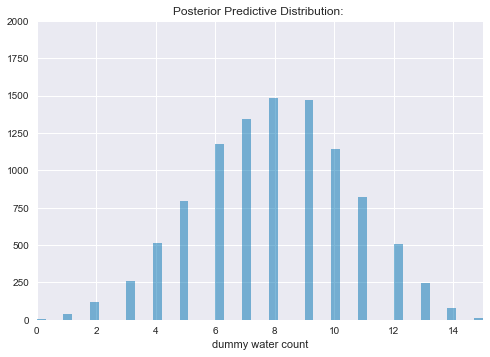

In [318]:
def dummy_values(
    n=15,
    p=[], 
    extra_title="", 
    max_y=2000,
    bins=50,
    xlabel='dummy water count'
):
    
    assert len(p) > 0, "Please give probabilities!"
    dummy = stats.binom.rvs(n=n, p=p)

    axes = plt.gca()
    axes.set_xlim([0,n])
    axes.set_ylim([0,max_y])
    plt.hist(dummy, bins=bins, alpha=0.5)
    plt.xlabel(xlabel);
    plt.title('Posterior Predictive Distribution: {}'.format(extra_title))

    return dummy

dummy_values(n=15, p=samples_15_w_8)

# Plain English:
# If you didn't know the exact value of p, after observing the data,
# when you toss the globe 15 times,
# what's the probability of getting a total of 1,2,3... waters when you toss 
# the globe?
#
# P(D | w=8, n=15)

In [51]:
dummy_values_w_hw

array([ 8, 11, 11, ...,  8,  9,  6])

In [52]:
(dummy_values_w_hw == 8).mean()

0.14680000000000001

## 3M4.

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

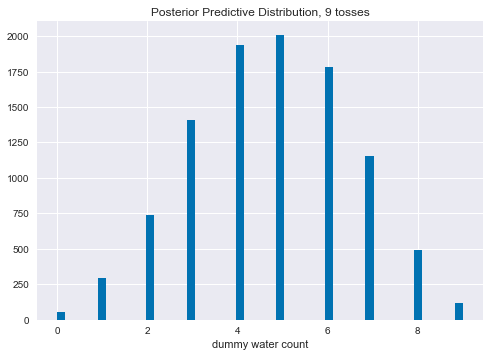

In [126]:
dummy_values_w_hw_9_tosses = stats.binom.rvs(n=9, p=samples_15_w_8)
#dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
#dummy_w = stats.binom.rvs(n=9, p=samples)

plt.hist(dummy_values_w_hw_9_tosses, bins=50)
plt.xlabel('dummy water count');
plt.title('Posterior Predictive Distribution, 9 tosses')

# Plain English:
# If you didn't know the exact value of p, after observing the data,
# when you toss the globe 15 times,
# what's the probability of getting a total of 1,2,3... waters when you toss 
# the globe?
#
# P(D | w=8, n=15)

In [117]:
def posterior_pred_dist(n=9, p=samples_15_w_8):
    dummy_values_w = stats.binom.rvs(n=n, p=p)
    #dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
    #dummy_w = stats.binom.rvs(n=9, p=samples)

    plt.hist(dummy_values_w, bins=50)
    plt.xlabel('dummy water count');
    plt.title('Posterior Predictive Distribution, {} tosses'.format(n))
    
    return dummy_values_w

array([3, 5, 4, 5, 1, 6, 7, 5, 5, 7, 3, 4, 5, 6, 4, 6, 5, 4, 6, 4, 6, 4, 2,
       5, 5, 5, 5, 2, 5, 4, 6, 2, 4, 4, 8, 5, 6, 4, 7, 6, 8, 4, 6, 5, 5, 5,
       6, 4, 5, 7, 4, 2, 2, 7, 6, 6, 5, 3, 5, 5, 5, 2, 6, 5, 5, 4, 3, 5, 5,
       8, 4, 4, 2, 3, 3, 4, 5, 6, 4, 6, 2, 4, 3, 5, 4, 5, 8, 3, 6, 3, 2, 6,
       4, 7, 4, 3, 4, 1, 5, 3, 3, 6, 5, 3, 5, 4, 4, 8, 6, 4, 3, 5, 5, 5, 6,
       5, 5, 4, 1, 3, 5, 4, 5, 6, 3, 5, 7, 6, 5, 6, 2, 6, 5, 4, 6, 4, 6, 5,
       2, 4, 2, 7, 5, 5, 5, 5, 6, 3, 5, 4, 5, 7, 3, 5, 3, 5, 4, 2, 6, 3, 5,
       5, 5, 8, 5, 3, 3, 6, 2, 6, 5, 2, 2, 7, 3, 3, 5, 7, 7, 1, 4, 6, 7, 5,
       5, 5, 4, 4, 3, 6, 6, 3, 7, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 4,
       4, 7, 4, 5, 5, 6, 5, 3, 4, 7, 6, 5, 5, 2, 4, 2, 2, 6, 3, 2, 7, 7, 4,
       5, 4, 5, 5, 3, 4, 5, 6, 6, 7, 3, 5, 4, 2, 2, 4, 4, 6, 3, 4, 5, 5, 4,
       5, 3, 5, 3, 5, 5, 7, 4, 5, 2, 5, 5, 5, 3, 5, 2, 3, 3, 4, 5, 5, 5, 4,
       5, 4, 2, 4, 3, 1, 4, 6, 6, 4, 4, 5, 5, 5, 3, 6, 3, 5, 8, 3, 4, 4, 4,
       2, 8,

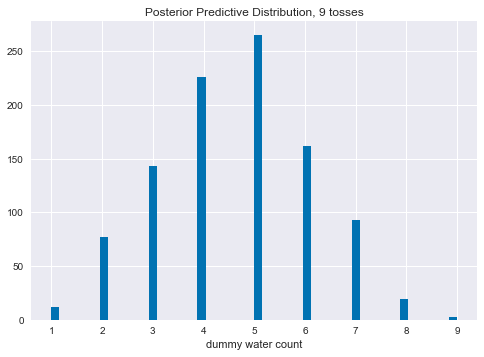

In [118]:
posterior_pred_dist(n=9, p=np.ones(1000) * 0.5)

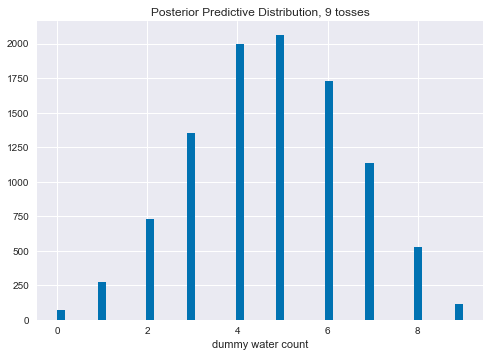

In [123]:
dummy_vals = posterior_pred_dist(n=9, p=samples_15_w_8)

In [124]:
(dummy_vals == 6).mean()

0.1726

In [125]:
samples_15_w_8

array([ 0.66366366,  0.8048048 ,  0.71071071, ...,  0.62062062,
        0.68368368,  0.4034034 ])

## 3M5.

Start over at 3M1, but now use a prior that is zero below $p=0.5$ and a constant above $p=0.5$. This corresponds to prior information that a majority of the Earth's surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compute inferences (using both priors) to the true value $p=0.7$.

In [151]:
len((np.linspace(0,1, 100) >50).astype(float))

100

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


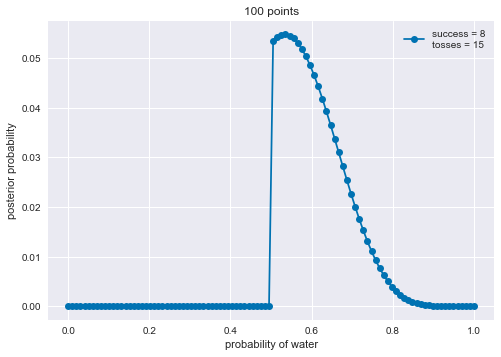

In [155]:
w_8_n_15_prior_half_p_grid, w_8_n_15_prior_half_posterior  = grid_approx_plot(
    points=100,
    w=8,
    n=15,
    prior=(np.linspace(0,100, 100) > 50).astype(float)
)

In [163]:
# probability that it is 0.7
# uninformative prior vs informative prior
posterior_n_15_w_8[700], w_8_n_15_prior_half_posterior[70]

(0.0012885561873589618, 0.02010096690508589)

In [162]:
len(posterior_n_15_w_8)

1000

In [165]:
# Draw 10000 samples from grid approx:

w_8_n_15_prior_half_samples = np.random.choice(
    w_8_n_15_prior_half_p_grid, 
    p=w_8_n_15_prior_half_posterior, 
    size=int(1e4), 
    replace=True)

In [168]:
# Highest posterior density interval is now much narrower, and closer to the true value,
# compared to the uninformative prior
pm.hpd(samples_15_w_8, alpha=1.0-0.9), pm.hpd(w_8_n_15_prior_half_samples, alpha=0.1)

(array([ 0.34034034,  0.72672673]), array([ 0.50505051,  0.71717172]))

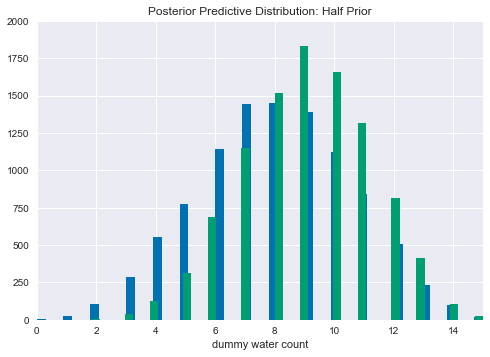

In [204]:
# Posterior predictive check
dummy_uniform_prior_n_15 = dummy_values(n=15, p=samples_15_w_8, extra_title='Uniform Prior')

# Posterior predictive check
dummy_half_prior_n_15 = dummy_values(n=15, p=w_8_n_15_prior_half_samples, extra_title='Half Prior')

In [200]:
# The "true" value is now more likely with the informative prior
(dummy_uniform_prior == 8).mean(), (dummy_half_prior == 8).mean()

(0.1449, 0.15379999999999999)

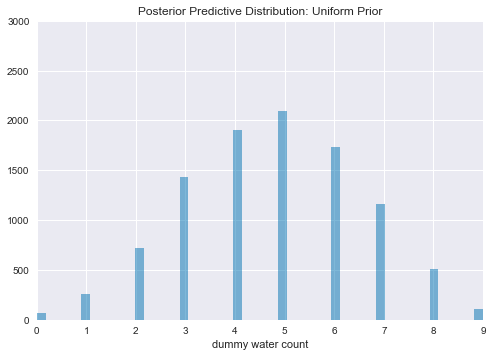

In [211]:
# Posterior predictive check
dummy_uniform_prior_n_9 = dummy_values(
    n=9, 
    p=samples_15_w_8, 
    extra_title='Uniform Prior',
    max_y=3000)



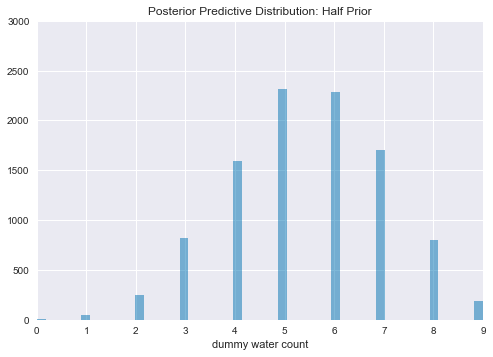

In [212]:
# Posterior predictive check
dummy_half_prior_n_9 = dummy_values(
    n=9, 
    p=w_8_n_15_prior_half_samples, 
    extra_title='Half Prior',
    max_y=3000
)

In [205]:
# 6/9 is a few percentage points more likely using the half prior
(dummy_uniform_prior_n_9 == 6).mean(), (dummy_half_prior_n_9 == 6).mean()

(0.18709999999999999, 0.23350000000000001)

In [213]:
dummy_uniform_prior_n_9.sum()

47696

In [214]:
dummy_half_prior_n_9.sum()

54668

In [215]:
# 0 is female
# 1 is male

birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [217]:
assert len(birth1) == len(birth2), "Birth1 length should be the same as Birth2 length"

## 3H1.

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter maximizes the posterior probability?

In [219]:
birth1.sum() + birth2.sum()

111

In [220]:
len(birth1) + len(birth2)

200

In [272]:
birth1.sum()

51

In [273]:
birth2.sum()

60

In [223]:
p_grid_births, posterior_coin_births = posterior_grid_approx(
    grid_points=100,
    success=111,
    tosses=200,
    prior=np.repeat(1.0, 100)
)

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [224]:
posterior_coin_birthsmax(posterior_coin_births)

0.11508624499848243

In [228]:
max(posterior_coin_births)

0.11508624499848243

In [229]:
posterior_coin_births[posterior_coin_births == max(posterior_coin_births)]

array([ 0.11508624])

In [243]:
# value of boy that best maximizes the posterior distribution
ind, = np.where(posterior_coin_births == max(posterior_coin_births))
p_grid_births[ind[0]]

0.55555555555555558

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


(array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
         0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
         0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
         0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
         0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
         0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
         0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
         0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
         0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
         0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
         0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
         0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
         0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
         0.65656566,  0.66666667,  0.67676768,  0.6

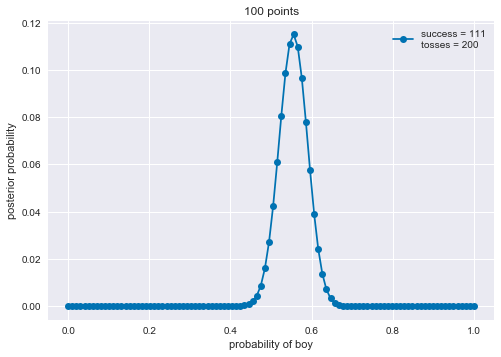

In [242]:
grid_approx_plot(
    points=100,
    w=111,
    n=200,
    prior=np.repeat(1.0, 100),
    x_label='probability of boy'
)

## 3H2.

Using the `sample` function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, 97% highest probability density intervals.

In [244]:
births_samples = np.random.choice(p_grid_births, p=posterior_coin_births, size=int(1e4))
births_samples

array([ 0.48484848,  0.56565657,  0.52525253, ...,  0.57575758,
        0.56565657,  0.57575758])

In [249]:
print(pm.hpd(births_samples, alpha=0.5))
print(pm.hpd(births_samples, alpha=0.89))
print(pm.hpd(births_samples, alpha=0.97))

[ 0.54545455  0.58585859]
[ 0.54545455  0.54545455]
[ 0.50505051  0.50505051]


## 3H3.

Use `rbinom` to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the `dens` command (part of the `rethinking` package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

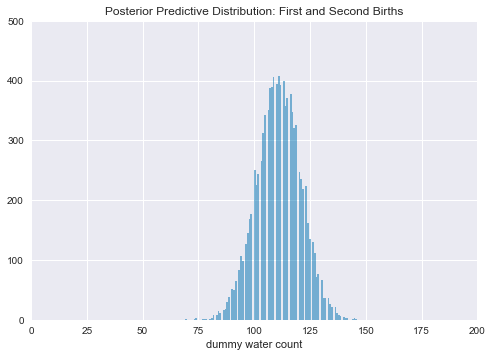

In [309]:
# 111 seems like it's the median of the distribution
dummy_births_200 = dummy_values(
    n=200, 
    p=births_samples, 
    extra_title='First and Second Births',
    max_y=500,
    bins=100
)

In [270]:
dummy_births.mean()

111.0273

## 3H4.

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

In [276]:
p_grid_first_births, posterior_first_births = posterior_grid_approx(
    grid_points=100,
    success=sum(birth1),
    tosses=len(birth1),
    prior=np.repeat(1.0, 100)
)

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


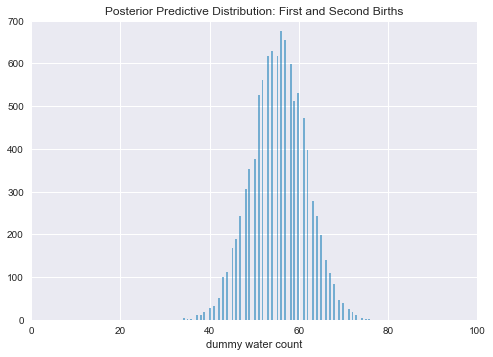

In [314]:
first_births_samples = np.random.choice(
    p_grid_first_births, 
    p=posterior_first_births,
    size=int(1e4)
)

# 111 seems like it's the median of the distribution
dummy_births_100 = dummy_values(
    n=100, 
    p=births_samples, 
    extra_title='First and Second Births',
    max_y=700,
    bins=100
)


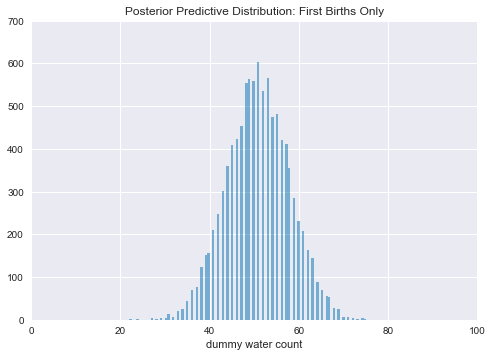

In [315]:

dummy_first_births = dummy_values(
    n=100, 
    p=first_births_samples, 
    extra_title='First Births Only',
    max_y=700,
    bins=100
)

In [288]:
def print_stats(samples='', title='', alpha=0.5):
    lower_bound, upper_bound = pm.hpd(samples, alpha)
    print('{}, hpd: [{},{}], diff: {}, mean: {}'.format(
        title,
        lower_bound,
        upper_bound,
        upper_bound-lower_bound,
        samples.mean()
   ))

In [316]:
# first births seem to favor boy and girl equally
# second births have a higher propensity for boys.

print_stats(samples=dummy_first_births, title='first births')
print_stats(samples=dummy_births_100, title='first and second births')


first births, hpd: [44,53], diff: 9, mean: 50.8809
first and second births, hpd: [49,57], diff: 8, mean: 55.4863


## 3H5.

The model assumes the sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [292]:
birth1

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1])

In [293]:
birth2

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0])

In [301]:
female_first_indices, = np.where(birth1 == 0)
len(female_first_indices)

49

In [303]:
# given that the first birth was female, how many of the second births were male?
birth2[female_first_indices].sum()

39

In [305]:
39/49.0

0.7959183673469388

/Users/eddericugaddan/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


Prob. boy 2nd birth, given girl 1st birth, hpd: [73,82], diff: 9, mean: 78.3768


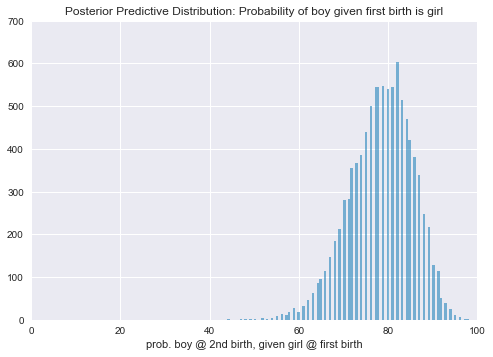

In [321]:
p_grid_boy_2nd_given_girl_1st, posterior_boy_2nd_given_girl_1st = posterior_grid_approx(
    grid_points=100,
    success=39,
    tosses=49,
    prior=np.repeat(1.0, 100)
)

samples_boy_2nd_given_girl_1st = np.random.choice(
    p_grid_boy_2nd_given_girl_1st,
    p=posterior_boy_2nd_given_girl_1st,
    size=int(1e4)
)

# My guess is that parents are artificially selecting for males when they already have females
# as a first kid (i.e. abortion)

dummy_boy_2nd_given_girl_1st = dummy_values(
    n=100, 
    p=samples_boy_2nd_given_girl_1st, 
    extra_title='Probability of boy given first birth is girl',
    max_y=700,
    bins=100,
    xlabel='prob. boy @ 2nd birth, given girl @ first birth'
)

print_stats(samples=dummy_boy_2nd_given_girl_1st, 
            title='Prob. boy 2nd birth, given girl 1st birth')